In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [158]:
#### Open File for reading and divide up by country and aspect (GDP or Life Expectancy)

In [159]:
data_life = pd.read_csv("all_data.csv")
data_life['GDP ($}/1e10'] = data_life.GDP/1e10

def proc_data(country,aspect):
    info=data_life[data_life.Country==country]
    variable=info[aspect]
    return variable

#China
china_life=proc_data('China','Life expectancy at birth (years)')
china_gdp=proc_data('China','GDP')
#Chile
chile_life=proc_data('Chile','Life expectancy at birth (years)')
chile_gdp=proc_data('Chile','GDP')
#Germany
germany_life=proc_data('Germany','Life expectancy at birth (years)')
germany_gdp=proc_data('Germany','GDP')
#Mexico
mexico_life=proc_data('Mexico','Life expectancy at birth (years)')
mexico_gdp=proc_data('Mexico','GDP')
#United States
us_life=proc_data('United States of America','Life expectancy at birth (years)')
us_gdp=proc_data('United States of America','GDP')
#Zimbabwe
zimbabwe_life=proc_data('Zimbabwe','Life expectancy at birth (years)')
zimbabwe_gdp=proc_data('Zimbabwe','GDP')


In [160]:
#### Plot the figure

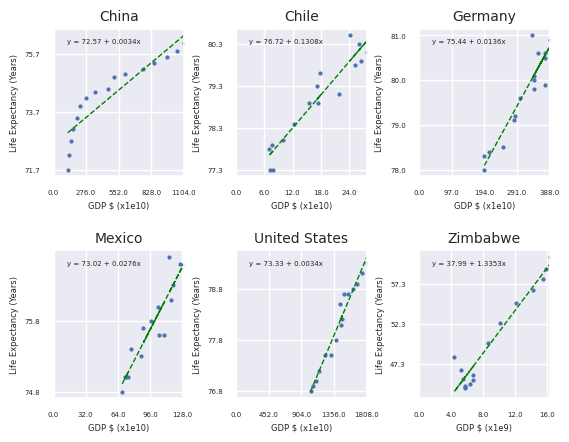

In [161]:
def plot_graph(gdp,life,col_ind,row_ind,name):
    ax[col_ind,row_ind].scatter(gdp,life,4)
    ax[col_ind,row_ind].set_title(name, size=10)
    if(name=="Zimbabwe"):
        ax[col_ind,row_ind].set_xlabel('GDP $ (x1e9)',size=6)    
    else:
        ax[col_ind,row_ind].set_xlabel('GDP $ (x1e10)',size=6)
    ax[col_ind,row_ind].set_ylabel('Life Expectancy (Years)',size=6)
    ax[col_ind,row_ind].set_xlim(0,np.max(gdp))
    x_interval = int((np.max(gdp))/4)
    y_interval = int(((np.max(life)+2) - (np.min(life)-2))/4)
    ax[col_ind,row_ind].set_xticks(np.arange(0, max(gdp), x_interval))
    ax[col_ind,row_ind].set_xticklabels(np.arange(0, max(gdp),x_interval),fontsize=5)
    ax[col_ind,row_ind].set_yticks(np.arange(min(life)-2,max(life)+3,y_interval))
    ax[col_ind,row_ind].set_yticklabels(np.arange(min(life)-2,max(life)+3,y_interval),fontsize=5)
    a, b = np.polyfit(gdp, life, 1)
    ax[col_ind,row_ind].plot(gdp, a*gdp+b, color='green', linestyle='--', linewidth=1)
    ax[col_ind,row_ind].text(0.1,0.9,'y = ' + '{:.2f}'.format(b) + ' + {:.4f}'.format(a) + 'x',transform=ax[col_ind,row_ind].transAxes, fontsize=5)

def model_fit(gdp,life_expectancy):
    model = sm.OLS.from_formula('life_expectancy ~ gdp', data = body_measurements)
    results = model.fit()
    slope=results.params[1]
    return slope


fig, ax = plt.subplots(2,3)

row=0
col=0
for name in ["China","Chile","Germany","Mexico","United States","Zimbabwe"]:
    if(name == "China"):
        gdp=china_gdp/1e10
        life=china_life
    elif(name == "Chile"):
        gdp=chile_gdp/1e10
        life=chile_life
    elif(name == "Germany"):
        gdp=germany_gdp/1e10
        life=germany_life
    elif(name == "Mexico"):
        gdp=mexico_gdp/1e10
        life=mexico_life
    elif(name == "United States"):
        gdp=us_gdp/1e10
        life=us_life
    elif(name == "Zimbabwe"):
        gdp=zimbabwe_gdp/1e9
        life=zimbabwe_life
         
    plot_graph(gdp,life,col,row,name)
    row=row+1
    if(row > 2):
        row=0
        col=col+1
plt.subplots_adjust(wspace=0.4,hspace=0.5)

   
    





In [162]:
# The change life expectancy and with change in GDP is quite small for China, Chile, Germany, Mexico
# and the United States with the United States having the least change in life expectancy for increase in GDP.  Zimbabwe 
# with the lowest GDP has the greatest change in life expectancy for change in GDP along with Chile.
# Nevertheless correlation coefficients are quite high for all indvidual countries strong relationships between GDP and life expectancy
# among each individual country.

<Axes: xlabel='GDP ($}/1e10', ylabel='Life expectancy at birth (years)'>

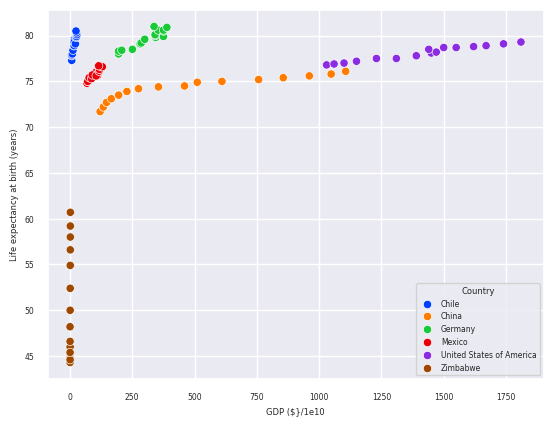

In [163]:
sns.scatterplot(x = 'GDP ($}/1e10', y = 'Life expectancy at birth (years)', hue = 'Country', palette = 'bright', data = data_life)

In [164]:
# It looks like above that we see an overall correlation between countries between GDP and Life Expectancy. 
# However we see cdountries like Chile, Mexico, and Germany with low GDP have high life expectancies which makes
# this correlation not so clear cut.  Other factors between countries could impact life expectancies.  
# We do see that Zimbabwe has both low life expectancy and GDP and the United States has high life expectancies 
# and some of the highest GDP values.   Looking at other variables including population for each country, which could give a 
# GDP per capita and also general happiness, amount of vacation time people take, hours worked should also be analyzed to get a better picture
# of what extent GDP could be used to predict life expectancy.

<Axes: xlabel='Country', ylabel='GDP ($}/1e10'>

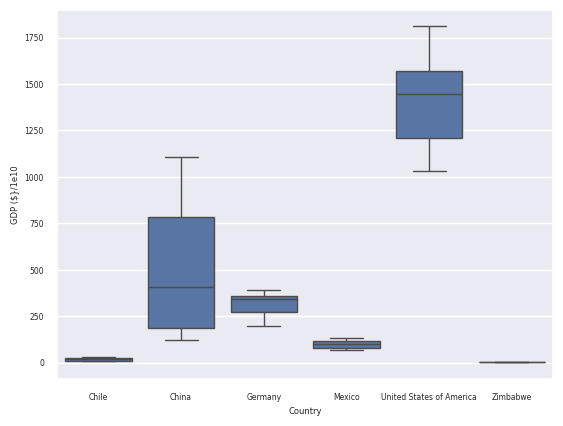

In [165]:
### Box Plots
sns.set(font_scale=0.5)
sns.boxplot(x = 'Country', y = 'GDP ($}/1e10', data=data_life)



<Axes: xlabel='Country', ylabel='Life expectancy at birth (years)'>

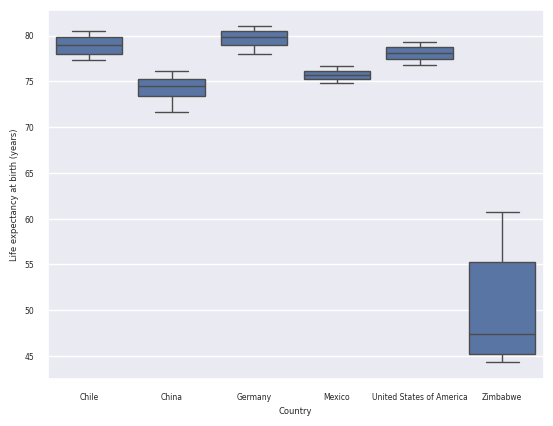

In [166]:
sns.boxplot(x = 'Country', y = 'Life expectancy at birth (years)', data=data_life)

In [167]:
# This inconsistancies between GDP and Life Expectancies are shown in the above box and whisker plots where we see Chile and Germany
# having around the same life expectancy as the Unites States despite having significantly lower GDP values than the United States.  
# The same also applies to Germany.  It appears as though Chile and Zimbabwe which have the highest changes in life expectancy 
# with changes in GDP have the lowest GDP while the United Staes with the highest GDP has relatively minimal change in life expectancy
# for change in GDP.

In [ ]:
model = sm.OLS.from_formula('weight ~ height', data = body_measurements)
results = model.fit()
print(results.params)